In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import pandas_profiling
from pylab import *

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
movies = pd.read_csv('movie.csv')
# read in and explore data
movies.describe(include='all')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,5024,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,...,5022.000000,5031,5038,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
unique,2,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,...,NaN,47,65,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Color,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,...,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,4815,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,...,NaN,4704,3807,2118,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,...,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,NaN,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,...,377.982886,NaN,NaN,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,NaN,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,...,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,...,65.000000,NaN,NaN,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,NaN,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,...,156.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,NaN,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,...,326.000000,NaN,NaN,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000


# Data analyses 

# Opschonen Dataset
Bij het opschonen van de dataset kunnen we een variabele 'selection' maken die de kolommen meeneemt uit bovenstaande selectie:

In [3]:
selection = movies[['movie_title', 'title_year', 'imdb_score', 'movie_facebook_likes', 'director_name', 'gross', 'duration', 'num_voted_users', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'genres']]

In [4]:
selection.dropna(subset=['movie_title'], inplace=True)
selection.dropna(thresh=14, inplace=True)
selection.drop_duplicates(subset=None, keep='first', inplace=True)

In [5]:
selection[['title_year', 'gross', 'duration', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']] = selection[['title_year', 'gross', 'duration', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].fillna(value=0)
selection = selection.astype({'title_year': int, 'gross': int, 'duration': int, 'actor_1_facebook_likes': int, 'actor_2_facebook_likes': int, 'actor_3_facebook_likes': int})
selection.set_index('movie_title', inplace=True)
selection.head(10)

,title_year,imdb_score,movie_facebook_likes,director_name,gross,duration,num_voted_users,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,genres
movie_title,,,,,,,,,,,,,,
Avatar,2009,7.9,33000,James Cameron,760505847,178,886204,CCH Pounder,Joel David Moore,Wes Studi,1000,936,855,Action|Adventure|Fantasy|Sci-Fi
Pirates of the Caribbean: At World's End,2007,7.1,0,Gore Verbinski,309404152,169,471220,Johnny Depp,Orlando Bloom,Jack Davenport,40000,5000,1000,Action|Adventure|Fantasy
Spectre,2015,6.8,85000,Sam Mendes,200074175,148,275868,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11000,393,161,Action|Adventure|Thriller
The Dark Knight Rises,2012,8.5,164000,Christopher Nolan,448130642,164,1144337,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000,23000,Action|Thriller
John Carter,2012,6.6,24000,Andrew Stanton,73058679,132,212204,Daryl Sabara,Samantha Morton,Polly Walker,640,632,530,Action|Adventure|Sci-Fi
Spider-Man 3,2007,6.2,0,Sam Raimi,336530303,156,383056,J.K. Simmons,James Franco,Kirsten Dunst,24000,11000,4000,Action|Adventure|Romance
Tangled,2010,7.8,29000,Nathan Greno,200807262,100,294810,Brad Garrett,Donna Murphy,M.C. Gainey,799,553,284,Adventure|Animation|Comedy|Family|Fantasy|Musi...
Avengers: Age of Ultron,2015,7.5,118000,Joss Whedon,458991599,141,462669,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000,19000,Action|Adventure|Sci-Fi
Harry Potter and the Half-Blood Prince,2009,7.5,10000,David Yates,301956980,153,321795,Alan Rickman,Daniel Radcliffe,Rupert Grint,25000,11000,10000,Adventure|Family|Fantasy|Mystery


In [6]:
# selection.profile_report(style={'full_width':True})

In [7]:
# # functie die laat zien hoeveel % van de waarden er mist per kolom
# # als we de schone dataset selection nemen komt er overal 0% te staan omdat dit compleet opgeschoond is
# def NaN_percent(df, column_name):
#     row_count = df[column_name].shape[0]
#     empty_values = row_count - df[column_name].count()
#     return (100.0*empty_values)/row_count
# for i in list(movies):
#     print(i +': ' + str(NaN_percent(movies,i))+'%')  

# Onderzoeksvraag:
## Wat is de invloed op populariteit van een film als er een populaire acteur wordt gecast?


We kunnen met zekerheid zeggen dat een acteur/actrice populairder is wanneer hij/zij onder andere veel facebook likes heeft. Hiervoor nemen we twee kolommen:
- actor_1_name
- actor_1_facebook_likes

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000., 45000.]), <a list of 10 Text xticklabel objects>)

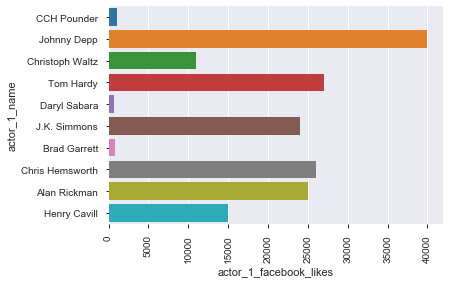

In [8]:
actor_1_name = selection['actor_1_name'].head(10)
actor_1_facebook_likes = selection['actor_1_facebook_likes'].head(10)

actor_popular = sns.barplot(x=actor_1_facebook_likes, y=actor_1_name, data=selection)
plt.xticks(rotation=90)

In [9]:
actor_1_facebook_likes.sort_values(ascending=False)

movie_title
Pirates of the Caribbean: At World's End     40000
The Dark Knight Rises                        27000
Avengers: Age of Ultron                      26000
Harry Potter and the Half-Blood Prince       25000
Spider-Man 3                                 24000
Batman v Superman: Dawn of Justice           15000
Spectre                                      11000
Avatar                                        1000
Tangled                                        799
John Carter                                    640
Name: actor_1_facebook_likes, dtype: int64

Nu gaan we kijken naar de populairste film en dit doen we met de volgende kolommen:
- movie_title
- imdb_score

We overwogen hier ook om kolom num_voted_users mee te nemen maar dit zou niet representatief zijn. Er zouden bijvoorbeeld alleen 3 mensen kunnen stemmen voor een film, als zij allemaal een hoge score geven is het gemiddelde heel erg hoog. 

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 10 Text xticklabel objects>)

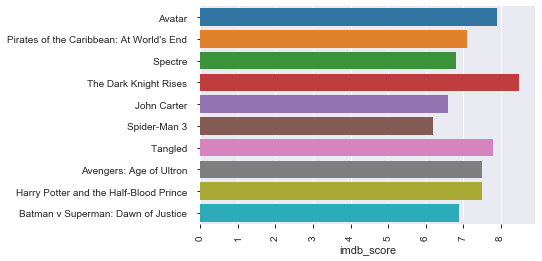

In [10]:
movie_title = selection.index.values.tolist()
imdb_score = selection['imdb_score'].head(10)

actor_popular = sns.barplot(x=imdb_score, y=movie_title[:10], data=selection)
plt.xticks(rotation=90)

In [11]:
imdb_score.sort_values(ascending=False)

movie_title
The Dark Knight Rises                        8.5
Avatar                                       7.9
Tangled                                      7.8
Harry Potter and the Half-Blood Prince       7.5
Avengers: Age of Ultron                      7.5
Pirates of the Caribbean: At World's End     7.1
Batman v Superman: Dawn of Justice           6.9
Spectre                                      6.8
John Carter                                  6.6
Spider-Man 3                                 6.2
Name: imdb_score, dtype: float64

In [12]:
totaal_actor_1_facebook_likes = selection['actor_1_facebook_likes']
totaal_actor_1_facebook_likes.sort_values(ascending=False)[:5]

movie_title
Anchorman: The Legend of Ron Burgundy     640000
Treachery                                 260000
Hardflip                                  260000
Kickboxer: Vengeance                      260000
The Final Destination                     164000
Name: actor_1_facebook_likes, dtype: int64

In [13]:
totaal_imdb_score = selection['imdb_score']
totaal_imdb_score.sort_values(ascending=False)[:5]

movie_title
The Shawshank Redemption     9.3
The Godfather                9.2
Kickboxer: Vengeance         9.1
The Dark Knight              9.0
The Godfather: Part II       9.0
Name: imdb_score, dtype: float64

In [14]:
# movie_title = selection.index.values.tolist()
selection.head()

,title_year,imdb_score,movie_facebook_likes,director_name,gross,duration,num_voted_users,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,genres
movie_title,,,,,,,,,,,,,,
Avatar,2009,7.9,33000,James Cameron,760505847,178,886204,CCH Pounder,Joel David Moore,Wes Studi,1000,936,855,Action|Adventure|Fantasy|Sci-Fi
Pirates of the Caribbean: At World's End,2007,7.1,0,Gore Verbinski,309404152,169,471220,Johnny Depp,Orlando Bloom,Jack Davenport,40000,5000,1000,Action|Adventure|Fantasy
Spectre,2015,6.8,85000,Sam Mendes,200074175,148,275868,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11000,393,161,Action|Adventure|Thriller
The Dark Knight Rises,2012,8.5,164000,Christopher Nolan,448130642,164,1144337,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000,23000,Action|Thriller
John Carter,2012,6.6,24000,Andrew Stanton,73058679,132,212204,Daryl Sabara,Samantha Morton,Polly Walker,640,632,530,Action|Adventure|Sci-Fi


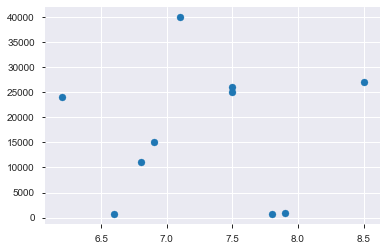

In [15]:
plt.scatter(imdb_score,actor_1_facebook_likes)
plt.show()

In [16]:
print(len(selection[selection['imdb_score'] == 0]))
print(len(selection[selection['actor_1_facebook_likes'] == 0]))

0
22


Er zijn voor 22 nul-waarden voor actor_1_facebook_likes. Omdat er niet duidelijke correlatie is tussen imdb_score en actor_1_facebook_likes, zouden we geen lineaire regressie kunnen toepassen omdat het dat geen duidelijk en eerlijk beeld schetst

In [17]:
selection['actor_1_facebook_likes'].mean()

6686.433271643019

In [18]:
print(selection[selection['actor_1_facebook_likes']== 0])

                                           title_year  imdb_score  \
movie_title                                                         
Travelers and Magicians                          2003         7.5   
The Gatekeepers                                  2012         7.6   
Wal-Mart: The High Cost of Low Price             2005         6.8   
Queen of the Mountains                           2014         8.7   
Elza                                             2011         6.7   
They Will Have to Kill Us First                  2015         7.7   
Crop Circles: Quest for Truth                    2002         7.0   
Julija in alfa Romeo                             2015         6.4   
Faith Connections                                2013         7.0   
Mad Hot Ballroom                                 2005         7.5   
Born to Fly: Elizabeth Streb vs. Gravity         2014         6.8   
51 Birch Street                                  2005         7.5   
UnDivided                         

### De populairste acteur is , Terwijl de populairste film is The Dark Knight is

In [19]:
# gemiddelde = actor_1_facebook_likes.mean()
# mediaan = actor_1_facebook_likes.median()
# modus = actor_1_facebook_likes.mode()
# std = actor_1_facebook_likes.std()
stats = ['gemiddelde','mediaan','modus','std']

def gegevens(variabelen):
    gemiddelde = variabelen.mean()
    mediaan = variabelen.median()
    modus = variabelen.mode()
    std = variabelen.std()
    return gemiddelde, mediaan, modus, std

def printGegevens(variabelen):
   gem = ("Gemiddelde: {} ".format(gegevens(variabelen)[0]))
   med = ("Mediaan: {}".format(gegevens(variabelen)[1]))
   mod = ("Modus: {} ".format(gegevens(variabelen)[2]))
   st =  ("Std: {}".format(gegevens(variabelen)[3]))
   return gem,med,mod,st

# for elem in printGegevens(actor_1_facebook_likes):
#     print(elem)
    
# x = gegevens(actor_1_facebook_likes)
# y = gegevens(imdb_score)
# plt.plot(stats,x,'ro',label='actor_1_facebook_likes')
# plt.plot(y,'go',label='imdb_score')
# plt.xlabel('gegevens')
# plt.ylabel('aantal')
# plt.title('statistieken')
# plt.legend()
# plt.show()

In [20]:
actor_1_name = selection['actor_1_name']
actor_2_name = selection['actor_2_name']
actor_3_name = selection['actor_3_name']

actor_1_facebook_likes = selection['actor_1_facebook_likes']
actor_2_facebook_likes = selection['actor_2_facebook_likes']
actor_3_facebook_likes = selection['actor_3_facebook_likes']

movie_title = selection.index.values.tolist()
num_voted_users = selection['num_voted_users']
num_voted_usersNULL = selection[selection['num_voted_users'] == 0]

imdb_score = selection['imdb_score']

In [21]:
totale_actor_likes = actor_1_facebook_likes + actor_2_facebook_likes + actor_3_facebook_likes

In [22]:
movie_facebook_likes = selection['movie_facebook_likes']
aantal_zonder_likes = selection[selection['movie_facebook_likes'] == 0]
print((100/len(movie_facebook_likes)) * len(aantal_zonder_likes)) # % wat mist 

43.40941805469875


In [23]:
gemiddelde_movie_facebook_likes = selection['movie_facebook_likes'].mean()

In [24]:
gemiddelde_movie_facebook_likes

7591.9107546781825

In [25]:
score1 = imdb_score
score2 = num_voted_users

# score1.sort_values(ascending=False)
# score2.sort_values(ascending=False)

In [26]:
# plt.scatter(score1,score2)

# z = np.polyfit(score1,score2,1)
# p = np.poly1d(z)
# plt.plot(x,p(x),"r--")
# plt.show()

# print("y=%.6fx+(%.6f)"%(z[0],z[1]))

### hoe hoger de imdb_score, hoe hoger het aantal wat gestemd heeft. Dit geeft nog steeds niet volledig inzicht omdat er veel waarden zijn voor num_voted_users die veel te laag zijn om er correlatie in te zien met de imdb_score

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(actor_1_facebook_likes, imdb_score, test_size = 0.2, random_state = 0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [28]:
# print(X_train.shape,y_train.shape)
# print(X_test.shape,y_test.shape)

In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model = lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

In [30]:
print(predictions[0:5])
print(y_test[0:5])

[[6.48406123]
 [6.39517825]
 [6.37644616]
 [6.37414632]
 [6.48961641]]
[[7.5]
 [5.3]
 [7.8]
 [3.5]
 [5.5]]


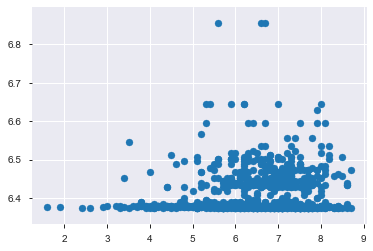

In [31]:
plt.scatter(y_test,predictions)

In [32]:
y_train2 = y_train.astype(int)
y_test2 = y_test.astype(int)

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gs = GaussianNB()
model_gs = gs.fit(X_train,y_train2)
predictions_gs = gs.predict(X_test)

gs_score = model_gs.score(X_test,y_test2) * 100

In [34]:
gs_score

34.42959917780062

Voordat we alle aantallen hebben afgerond waren er 0, 0-waarden. Nu ronden we alles af op tienduizend-tallen om zo te categoriseren en zijn er 881 waarden die afgerond worden naar 0.

# OVERIG

# Wat is de invloed op populariteit van een film als er een populaire acteur wordt gecast?

- bereken de populariteit van een acteur -> naam linken aan facebook-likes
- bereken de populariteit van een film -> film linken aan imdb-score

In [35]:
actor_1_name = selection['actor_1_name']
actor_2_name = selection['actor_2_name']
actor_3_name = selection['actor_3_name']

actor_1_facebook_likes = selection['actor_1_facebook_likes']
actor_2_facebook_likes = selection['actor_2_facebook_likes']
actor_3_facebook_likes = selection['actor_3_facebook_likes']

movie_title = selection.index.values.tolist()
imdb_score = selection['imdb_score']

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Text xticklabel objects>)

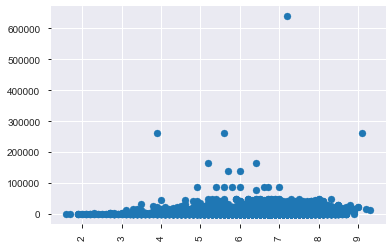

In [36]:
# plt.figure(figsize=(20, 10), dpi=100)
plt.scatter(imdb_score,actor_1_facebook_likes)
plt.xticks(rotation=90)

Wat er duidelijk naar voren komt in het grafiek hierboven is dat er wel degelijk een correlatie is tussen imdb_score van een film en de populariteit van een acteur gemeten met facebook likes. 
Echter zijn er ook  gevallen waarin de facebook likes niet veel over de film zelf vertelt. In het voorbeeld hierboven speelt de acteur met de meeste likes niet in een film die het best heeft gescoord op imdb.

In [37]:
# import plotly.express as px
# iris = px.data.iris()
# fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width',
#               color='species')
# fig.show()

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(actor_1_facebook_likes,imdb_score,test_size = 0.2, random_state = 0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [40]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(3890, 1) (3890, 1)
(973, 1) (973, 1)


In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [42]:
model = lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

fit functie gebruiken op de train_set om de test_set te voorspellen

In [43]:
predictions[0:5]

array([[6.48406123],
       [6.39517825],
       [6.37644616],
       [6.37414632],
       [6.48961641]])

In [44]:
y_test[0:5]

array([[7.5],
       [5.3],
       [7.8],
       [3.5],
       [5.5]])

Zoals je ziet wijken de voorspellingen heel erg af van de werkelijke test_set

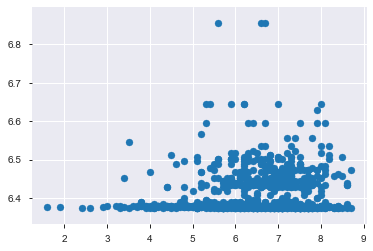

In [87]:
plt.scatter(y_test,predictions)
# x true values en y predictions

In [46]:
lr_score = model.score(X_test,y_test) * 100

In [47]:
lr_score

0.9596415643765122

In [48]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

Voor het Gaussian algoritme moeten we de float-waarden in de 2D-array converten naar int-waarden

In [49]:
y_train2 = y_train.astype(int)
y_test2 = y_test.astype(int)

gs = GaussianNB()
model_gs = gs.fit(X_train,y_train2)
predictions_gs = gs.predict(X_test)

gs_score = model_gs.score(X_test,y_test2) * 100

In [50]:
gs_score

34.42959917780062

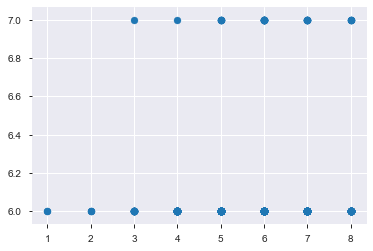

In [51]:
plt.scatter(y_test2,predictions_gs) # hier nog even verder naar kijken; wat betekent het

In [52]:
from sklearn.svm import SVC

svc = SVC()
model_svc = svc.fit(X_train, y_train2)
predictions_svc = svc.predict(X_test)

svc_score = model_svc.score(X_test,y_test2) * 100

In [53]:
svc_score

34.943473792394656

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dt = DecisionTreeClassifier()
model_dt = dt.fit(X_train, y_train2)
predictions_dt = dt.predict(X_test)

dt_score = model_dt.score(X_test,y_test2) * 100

In [56]:
dt_score

31.96300102774923

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn = KNeighborsClassifier()
model_knn = knn.fit(X_train, y_train2)
predictions_knn = knn.predict(X_test)

knn_score = model_knn.score(X_test,y_test2) * 100

In [59]:
knn_score

31.551901336073996

In [60]:
from sklearn.linear_model import Perceptron

In [61]:
perceptron = Perceptron()
model_perceptron = perceptron.fit(X_train, y_train2)
predictions_perceptron = perceptron.predict(X_test)

perceptron_score = model_perceptron.score(X_test,y_test2) * 100

In [62]:
perceptron_score

6.3720452209660845

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
randomforest = RandomForestClassifier()
model_randomforest = randomforest.fit(X_train, y_train2)
predictions_randomforest = randomforest.predict(X_test)
randomforest_score = model_randomforest.score(X_test,y_test2) * 100

In [65]:
randomforest_score

32.27132579650565

In [66]:
from sklearn.linear_model import SGDClassifier

In [67]:
sgd = SGDClassifier()
model_sgd = sgd.fit(X_train, y_train2)
predictions_sgd = sgd.predict(X_test)
sgd_score = model_sgd.score(X_test, y_test2) * 100

In [68]:
sgd_score

1.9527235354573484

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
gbk = GradientBoostingClassifier()
model_gbk = gbk.fit(X_train, y_train2)
predictions_gbk = gbk.predict(X_test)
gbk_score = model_gbk.score(X_test, y_test2) * 100

In [71]:
gbk_score

34.224049331963

In [72]:
vergelijking = pd.DataFrame({'Model':['Logistic Regression','Gaussian','SVC','Decision Tree','Kneighbors','Perceptron','SGDClassifier','GradientBoostingClassifier'],'Score': [lr_score,gs_score,svc_score,dt_score,knn_score,perceptron_score,sgd_score,gbk_score]})
vergelijking.sort_values(by='Score',ascending=False)

,Model,Score
2,SVC,34.943474
1,Gaussian,34.429599
7,GradientBoostingClassifier,34.224049
3,Decision Tree,31.963001
4,Kneighbors,31.551901
5,Perceptron,6.372045
6,SGDClassifier,1.952724
0,Logistic Regression,0.959642


# betere scores krijgen:

In [73]:
selection_new = selection
actor_1_name_new = selection_new['actor_1_name']
actor_1_facebook_likes_new = selection_new['actor_1_facebook_likes']

movie_title_new = selection_new.index.values.tolist()
imdb_score_new = selection_new['imdb_score']

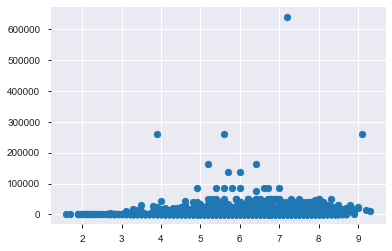

In [74]:
plt.scatter(imdb_score_new,actor_1_facebook_likes_new)
plt.show()

In [75]:
print(len(selection_new[selection_new['imdb_score'] == 0]))
print(len(selection_new[selection_new['actor_1_facebook_likes'] == 0]))

0
22


Er zijn voor 22 nul-waarden voor actor_1_facebook_likes. Omdat er niet duidelijke correlatie is tussen imdb_score en actor_1_facebook_likes, zouden we geen lineaire regressie kunnen toepassen omdat het dat geen duidelijk en eerlijk beeld schetst

In [76]:
gemiddelde_actor_1_facebook_likes = selection_new['actor_1_facebook_likes'].mean()

In [77]:
gemiddelde_actor_1_facebook_likes

6686.433271643019

In [78]:
print(selection_new[selection_new['actor_1_facebook_likes']== 0])

                                           title_year  imdb_score  \
movie_title                                                         
Travelers and Magicians                          2003         7.5   
The Gatekeepers                                  2012         7.6   
Wal-Mart: The High Cost of Low Price             2005         6.8   
Queen of the Mountains                           2014         8.7   
Elza                                             2011         6.7   
They Will Have to Kill Us First                  2015         7.7   
Crop Circles: Quest for Truth                    2002         7.0   
Julija in alfa Romeo                             2015         6.4   
Faith Connections                                2013         7.0   
Mad Hot Ballroom                                 2005         7.5   
Born to Fly: Elizabeth Streb vs. Gravity         2014         6.8   
51 Birch Street                                  2005         7.5   
UnDivided                         

In [79]:
selection_new = selection_new.mask(selection_new == 0, gemiddelde_actor_1_facebook_likes).round()

In [80]:
print(len(selection_new[selection_new['actor_1_facebook_likes'] == 0]))

0


(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Text xticklabel objects>)

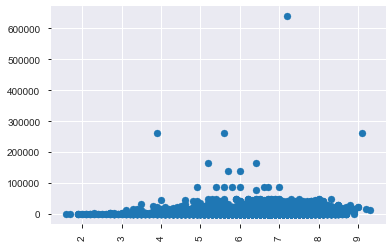

In [81]:
plt.scatter(imdb_score,actor_1_facebook_likes)
plt.xticks(rotation=90)

In [84]:
selection_new.corr()

,title_year,imdb_score,movie_facebook_likes,gross,duration,num_voted_users,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes
title_year,1.000000,-0.205250,0.212607,0.062368,-0.014770,0.008412,0.087340,0.107668,0.100156
imdb_score,-0.205250,1.000000,0.268499,0.195580,0.023605,0.415762,0.084615,0.094257,0.076708
movie_facebook_likes,0.212607,0.268499,1.000000,0.405269,0.027442,0.543347,0.144643,0.236578,0.220944
gross,0.062368,0.195580,0.405269,1.000000,0.030743,0.648209,0.160360,0.261522,0.235723
duration,-0.014770,0.023605,0.027442,0.030743,1.000000,0.044733,0.005471,0.013631,0.008452
num_voted_users,0.008412,0.415762,0.543347,0.648209,0.044733,1.000000,0.187766,0.253019,0.216284
actor_1_facebook_likes,0.087340,0.084615,0.144643,0.160360,0.005471,0.187766,1.000000,0.381770,0.204221
actor_2_facebook_likes,0.107668,0.094257,0.236578,0.261522,0.013631,0.253019,0.381770,1.000000,0.523364
actor_3_facebook_likes,0.100156,0.076708,0.220944,0.235723,0.008452,0.216284,0.204221,0.523364,1.000000


In [89]:
actor_1_facebook_likes_new = selection_new['actor_1_facebook_likes']
imdb_score_new = selection_new['imdb_score']

actor_1_facebook_likes_new = actor_1_facebook_likes_new.values.reshape(-1,1)

In [95]:
linreg_actor_imdb = lr.fit(actor_1_facebook_likes_new,imdb_score_new)
print(linreg_actor_imdb)
# print('m: ', linreg_actor_imdb.coef_[0][0])
# print('c: ', linreg_actor_imdb.intercept_[0])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [98]:
regressie_actor_imdb = linreg_actor_imdb.predict(actor_1_facebook_likes_new)